### Analysis of factors that affect student's quality of academic performance

1- Age
2- Gender
3 - Geographical belongingness
4 - Ethnicity
5 - Marital status
6 - socioeconomic status (SES)
7 - parents’ education level
8 - parental profession
9 - language
10 - income
11 - religious affiliations


# Importação das bibliotecas

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import locale
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer

# Carregando os dados

### Dataset information:



In [92]:
# data = pd.read_csv("../../dataset/MICRODADOS_ENEM_2018.csv", sep=';', encoding='cp1252')
data = pd.read_csv("../datasets/integrated_data.csv", sep=',')

# Exploração inicial dos dados

In [93]:
data.shape

(8000, 50)

In [94]:
data.head()

,NU_INSCRICAO,NU_ANO,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,160000301384,2016,João Pessoa,PB,23,M,0.0,3,1,7,...,A,A,A,C,B,B,C,B,B,B
1,160000000001,2016,Vitorino,PR,20,M,0.0,1,1,3,...,B,A,A,B,B,A,C,B,B,B
2,160000000002,2016,Salvador,BA,21,M,0.0,3,1,1,...,A,A,A,B,A,A,C,B,B,B
3,160000000003,2016,Belém,PA,17,M,0.0,1,1,1,...,A,A,A,B,B,A,B,A,A,B
4,160000000004,2016,Brasília,DF,36,F,2.0,1,1,10,...,A,A,A,A,A,A,A,A,A,A


In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   NU_INSCRICAO             8000 non-null   int64  
 1   NU_ANO                   8000 non-null   int64  
 2   NO_MUNICIPIO_RESIDENCIA  8000 non-null   object 
 3   SG_UF_RESIDENCIA         8000 non-null   object 
 4   NU_IDADE                 8000 non-null   int64  
 5   TP_SEXO                  8000 non-null   object 
 6   TP_ESTADO_CIVIL          8000 non-null   float64
 7   TP_COR_RACA              8000 non-null   int64  
 8   TP_ST_CONCLUSAO          8000 non-null   int64  
 9   TP_ANO_CONCLUIU          8000 non-null   int64  
 10  TP_ESCOLA                8000 non-null   int64  
 11  TP_PRESENCA_CN           8000 non-null   int64  
 12  TP_PRESENCA_CH           8000 non-null   int64  
 13  TP_PRESENCA_LC           8000 non-null   int64  
 14  TP_PRESENCA_MT          

In [96]:
data.isna().sum()

NU_INSCRICAO               0
NU_ANO                     0
NO_MUNICIPIO_RESIDENCIA    0
SG_UF_RESIDENCIA           0
NU_IDADE                   0
TP_SEXO                    0
TP_ESTADO_CIVIL            0
TP_COR_RACA                0
TP_ST_CONCLUSAO            0
TP_ANO_CONCLUIU            0
TP_ESCOLA                  0
TP_PRESENCA_CN             0
TP_PRESENCA_CH             0
TP_PRESENCA_LC             0
TP_PRESENCA_MT             0
NU_NOTA_CN                 0
NU_NOTA_CH                 0
NU_NOTA_LC                 0
NU_NOTA_MT                 0
NU_NOTA_COMP1              0
NU_NOTA_COMP2              0
NU_NOTA_COMP3              0
NU_NOTA_COMP4              0
NU_NOTA_COMP5              0
NU_NOTA_REDACAO            0
Q001                       0
Q002                       0
Q003                       0
Q004                       0
Q005                       0
Q006                       0
Q007                       0
Q008                       0
Q009                       0
Q010          

In [97]:
data.describe()

,NU_INSCRICAO,NU_ANO,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,Q005
count,8.000000e+03,8000.000000,8000.000000,8000.000000,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,1.750032e+11,2017.500000,24.321875,0.410000,2.11450,1.261125,4.516750,1.144750,0.696625,0.725625,0.720250,0.691250,3.716375
std,1.118194e+10,1.118104,7.493350,0.618828,1.00872,0.602689,4.144921,0.392513,0.461915,0.447625,0.450017,0.463897,1.566681
min,1.600000e+11,2016.000000,13.000000,0.000000,0.00000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.675034e+11,2016.750000,19.000000,0.000000,1.00000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,1.750061e+11,2017.500000,22.000000,0.000000,2.00000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000
75%,1.825073e+11,2018.250000,28.000000,1.000000,3.00000,1.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000
max,1.900032e+11,2019.000000,72.000000,4.000000,6.00000,4.000000,13.000000,4.000000,2.000000,2.000000,2.000000,2.000000,20.000000


### Listing columns

In [98]:
data.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'NO_MUNICIPIO_RESIDENCIA',
       'SG_UF_RESIDENCIA', 'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL',
       'TP_COR_RACA', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001',
       'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009',
       'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017',
       'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025'],
      dtype=object)

## Factor 1: Geographical belongingness

### Conferindo cidade e estado de origem dos participantes

In [99]:
data[['SG_UF_RESIDENCIA','NO_MUNICIPIO_RESIDENCIA']]

,SG_UF_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA
0,PB,João Pessoa
1,PR,Vitorino
2,BA,Salvador
3,PA,Belém
4,DF,Brasília
...,...,...
7995,RJ,Araruama
7996,MG,Canaã
7997,RJ,Itaboraí
7998,PR,Cascavel


### Conferindo Estados que tem pelo menos 1 participante

In [100]:
data['SG_UF_RESIDENCIA'].unique()

array(['PB', 'PR', 'BA', 'PA', 'DF', 'CE', 'SP', 'RJ', 'RN', 'ES', 'MG',
       'PE', 'MS', 'GO', 'SE', 'MT', 'PI', 'RS', 'AL', 'TO', 'AM', 'MA',
       'SC', 'RO', 'RR', 'AC', 'AP'], dtype=object)

### Total de alunos por Unidade Federativa

To-do: Fazer uma mapa com os quantitaivos (ou percentuais) de alunos por Estado ou por região

In [101]:
data['SG_UF_RESIDENCIA'].value_counts()

SP    1469
MG     941
BA     766
RJ     497
CE     478
PE     448
PR     388
RS     367
GO     301
PA     275
MA     265
DF     202
PB     196
ES     186
SC     183
RN     167
PI     149
MT     121
AM     115
SE     101
AL      93
MS      92
TO      64
RO      58
AP      37
AC      22
RR      19
Name: SG_UF_RESIDENCIA, dtype: int64

C:\Users\cof2\anaconda3\envs\ufpe\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Participantes')

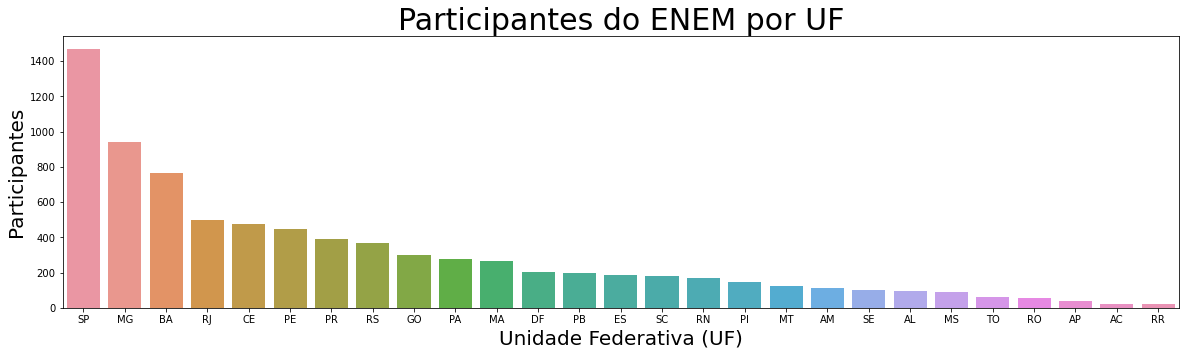

In [102]:
# pandas
# data['SG_UF_RESIDENCIA'].value_counts().plot.bar(figsize=(20,5))
# plt.title('Distribuição de Participantes do ENEM por UF', fontsize=30)
# plt.xlabel('UF', fontsize=20)
# plt.ylabel('Participantes', fontsize=20)

plt.figure(figsize=(20,5))
sns.barplot(data['SG_UF_RESIDENCIA'].value_counts().index,
            data['SG_UF_RESIDENCIA'].value_counts().values)
plt.title('Participantes do ENEM por UF', fontsize=30)
plt.xlabel('Unidade Federativa (UF)', fontsize=20)
plt.ylabel('Participantes', fontsize=20)

### Vemos que SP é o Estado com maior número de alunos. E Roraima tem o menor número de alunos 

### Plotando a proporção de participantes do ENEM por UF do total de participantes

Text(0, 0.5, 'Participantes')

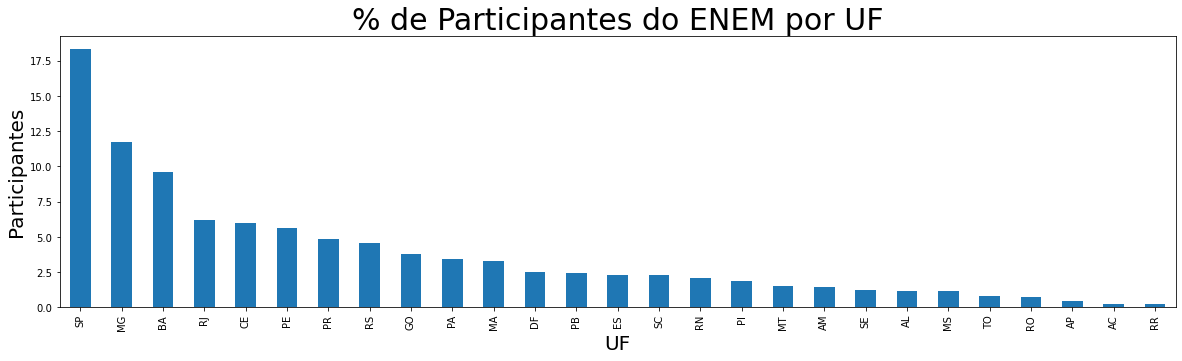

In [103]:
prop_UF = data['SG_UF_RESIDENCIA'].value_counts()/data['SG_UF_RESIDENCIA'].shape[0]*100
prop_UF.plot.bar(figsize=(20,5))
plt.title('% de Participantes do ENEM por UF', fontsize=30)
plt.xlabel('UF', fontsize=20)
plt.ylabel('Participantes', fontsize=20)

## Factor 2: Age

### Conferindo a distribuição dos alunos por faixa etária

In [104]:
data['NU_IDADE'].value_counts().sort_index()

13      1
14      2
15     25
16    111
17    629
18    960
19    807
20    681
21    594
22    464
23    439
24    389
25    362
26    291
27    238
28    209
29    204
30    190
31    171
32    151
33    110
34    114
35    118
36    100
37     85
38     70
39     77
40     54
41     52
42     38
43     43
44     29
45     36
46     20
47     18
48     18
49      9
50     12
51     11
52     14
53     13
54      6
55      6
56      6
57      7
58      4
59      2
60      2
61      1
62      2
64      3
65      1
72      1
Name: NU_IDADE, dtype: int64

C:\Users\cof2\anaconda3\envs\ufpe\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


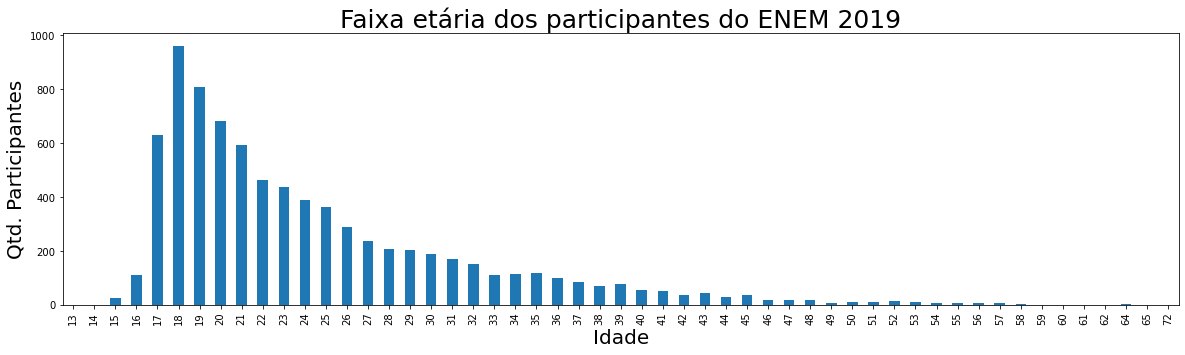

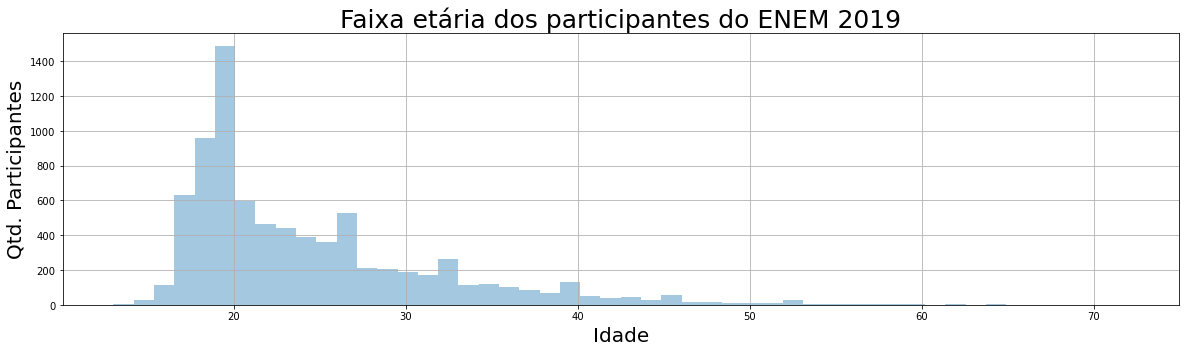

In [105]:
## Gráfico de Barras 
data['NU_IDADE'].value_counts().sort_index().plot.bar(figsize=(20,5))
plt.xlabel('Idade', fontsize=20)
plt.ylabel('Qtd. Participantes', fontsize=20)
plt.title('Faixa etária dos participantes do ENEM 2019', fontsize=25)

## Gráficos tipo Histograma
plt.figure(figsize=(20,5))
sns.distplot(data['NU_IDADE'], kde=False)
plt.xlabel('Idade', fontsize=20)
plt.ylabel('Qtd. Participantes', fontsize=20)
plt.title('Faixa etária dos participantes do ENEM 2019', fontsize=25)
plt.grid()

### Podemos observar que a maior parte dos alunos que fazem o ENEM estão entre 16 e 25 anos

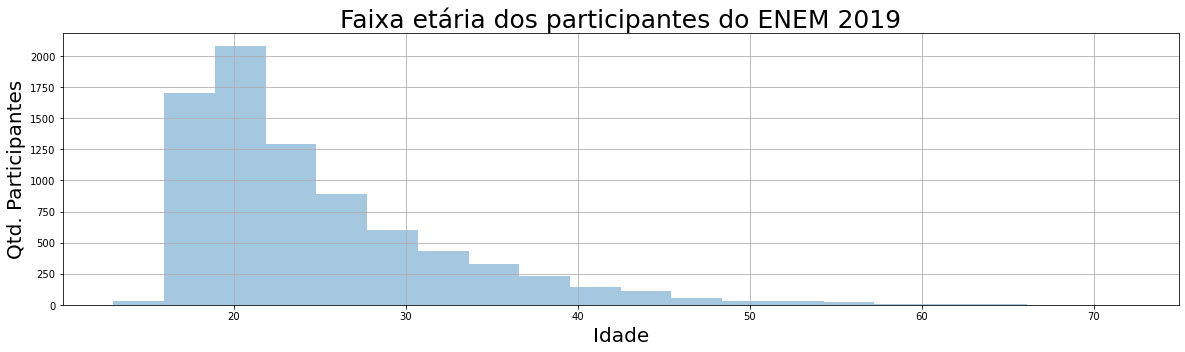

In [106]:
#Seaborn
plt.figure(figsize=(20,5))
sns.distplot(data['NU_IDADE'], kde=False,bins=20)
plt.xlabel('Idade', fontsize=20)
plt.ylabel('Qtd. Participantes', fontsize=20)
plt.title('Faixa etária dos participantes do ENEM 2019', fontsize=25)
plt.grid()

### Conferindo a proporção de cada idade dentro do total de participantes:

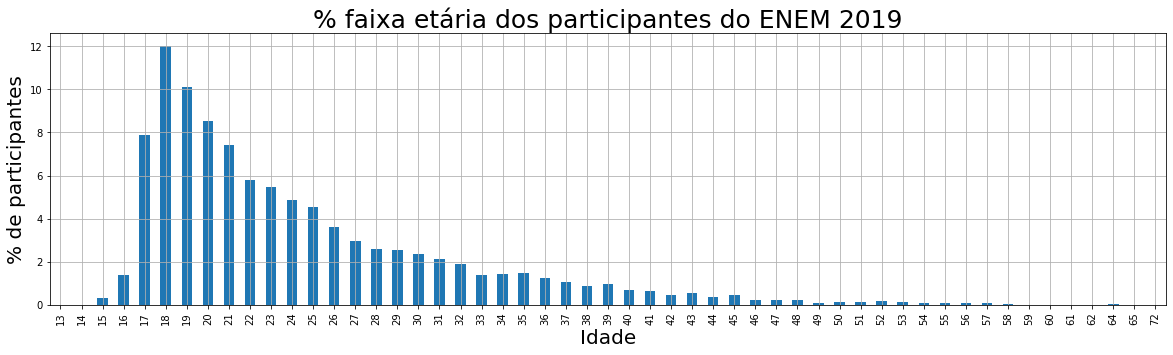

In [107]:
proprocao_idade = data['NU_IDADE'].value_counts().sort_index()/data.shape[0]*100 
proprocao_idade.plot.bar(figsize=(20,5))
plt.xlabel('Idade', fontsize=20)
plt.ylabel('% de participantes', fontsize=20)
plt.title('% faixa etária dos participantes do ENEM 2019', fontsize=25)
plt.grid()

### Faixa etária dos treineiros

Existe uma categoria de participantes no ENEM chamada ***Treineiro***, referente ao aluno que realiza a prova como qualquer outro participante sem entrar no processo de seleção de vestibular. 

O objetivo deste candidato é ganhar experiência e se preparar para o exame em anos seguintes.

Observa-se nos dados que existem participantes com idade inferior a esperada para a prova (17 a 18 anos). 

Vamos verificar quantos desses participantes são ou não treineiros:

In [110]:
# treineiro_sim = data.loc[data['IN_TREINEIRO']==1, 'NU_IDADE']
# treineiro_nao = data.loc[data['IN_TREINEIRO']==0, 'NU_IDADE']

# treineiro_nao.hist(bins=40,figsize=(20,5), label='Concorrência Geral')
# treineiro_sim.hist(bins=40,figsize=(20,5), label='Treineiro')
# plt.legend(fontsize=15)
# plt.xlabel('Idade', fontsize=20)
# plt.ylabel('Qtd. Participantes', fontsize=20)
# plt.title('Distribuição Etária dos Participantes do ENEM 2019', fontsize=25)

### Vemos que a maioria dos candidatos que prestam a prova como treineiros possuem menos de 20 anos.

## Factor 3: Sex

In [111]:
data['TP_SEXO'].value_counts().sort_index()

F    4981
M    3019
Name: TP_SEXO, dtype: int64

In [112]:
def graficoSexo(data):
  #Gera gráfico de pizza mostrando o quantitaivo de homens e mulheres
  mulheres = data[data['TP_SEXO'] == 'F']['TP_SEXO'].count()
  homens = data[data['TP_SEXO'] == 'M']['TP_SEXO'].count()
  qtdImoveis = [mulheres, homens]
  tipos = ['Mulher', 'Homem']
  plt.pie(qtdImoveis, labels=tipos, explode=[0.03,0.03], startangle=90, shadow=True, autopct='%1.1f%%', textprops={'color':"white"})
  plt.title("Quantitativo Homem x Mulher", color = 'white')
  plt.show()

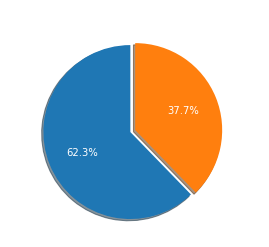

In [113]:
graficoSexo(data)

## Factor 4: Marital status

In [114]:
data['TP_ESTADO_CIVIL'].value_counts().sort_index()

0.0    5220
1.0    2342
2.0     378
3.0      58
4.0       2
Name: TP_ESTADO_CIVIL, dtype: int64

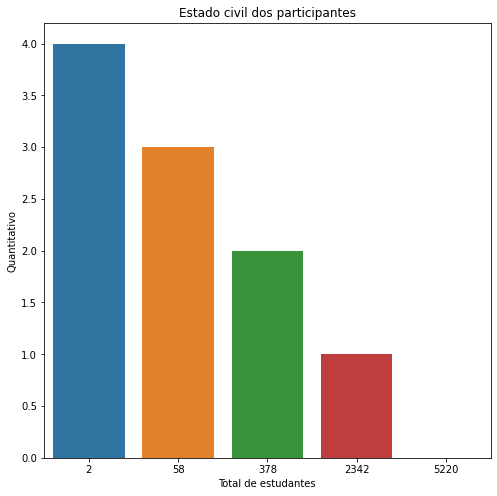

In [115]:
plt.figure(figsize=(8,8))
counts = data['TP_ESTADO_CIVIL'].value_counts()
ax = sns.barplot(y=counts.index,x=counts, orient='v')
plt.title('Estado civil dos participantes')
plt.xlabel('Total de estudantes')
plt.ylabel('Quantitativo')
plt.show()

### Factor 5: Ethnicity

In [116]:
data['TP_COR_RACA'].value_counts().sort_index()

0     131
1    2921
2    1131
3    3593
4     176
5      38
6      10
Name: TP_COR_RACA, dtype: int64

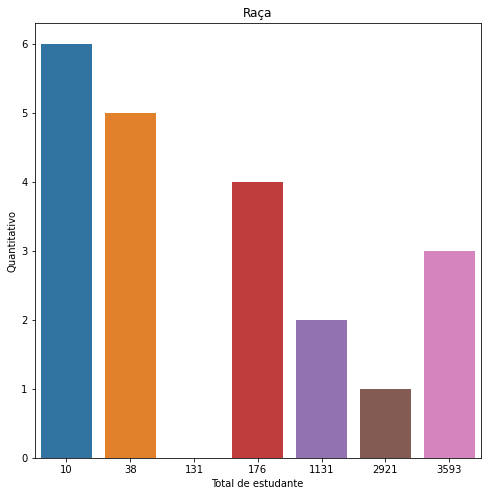

In [117]:
plt.figure(figsize=(8,8))
counts = data['TP_COR_RACA'].value_counts()
ax = sns.barplot(y=counts.index,x=counts, orient='v')
plt.title('Raça')
plt.xlabel('Total de estudante')
plt.ylabel('Quantitativo')
plt.show()

Observa-se que a maior parte dos alunos declarou ser de raça indígena. Enquanto a minoria declrou pertencer à raça branca

# Factor 5: Parents’ education level

### 5.1 Father's education level

In [118]:
from pandas.api.types import CategoricalDtype
father_education_dtype = CategoricalDtype(categories=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'], ordered=True)
mother_education_dtype = CategoricalDtype(categories=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'], ordered=True)

father_profession_dtype = CategoricalDtype(categories=['A', 'B', 'C', 'D', 'E', 'F', 'G'], ordered=True)
mother_profession_dtype = CategoricalDtype(categories=['A', 'B', 'C', 'D', 'E', 'F', 'G'], ordered=True)

parents_income_dtype = CategoricalDtype(categories=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q'], ordered=True)


In [119]:
data['Q001'].value_counts().sort_index()

A     442
B    2139
C    1078
D     985
E    2042
F     429
G     220
H     665
Name: Q001, dtype: int64

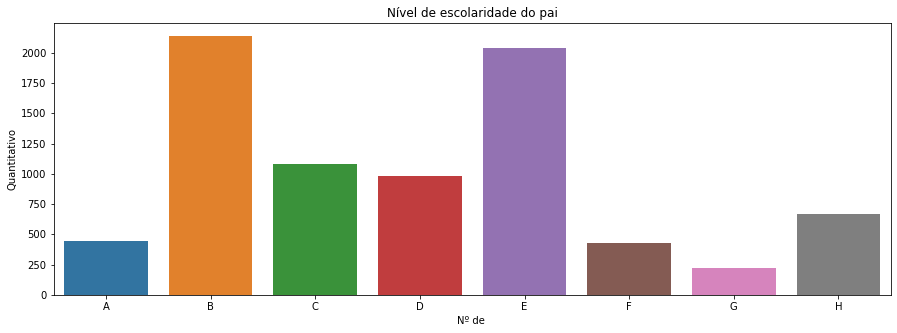

In [120]:
plt.figure(figsize=(15,5))
plt.title("Nível de escolaridade do pai")
ax = sns.countplot(x=data['Q001'].astype(father_education_dtype).sort_values(ascending=True))
# ax.yaxis.set_major_formatter(tkr.FuncFormatter(formatador_de_milhares))
plt.xlabel('Nº de ')
plt.ylabel('Quantitativo')
plt.show()

### 5.2 Mother's education level

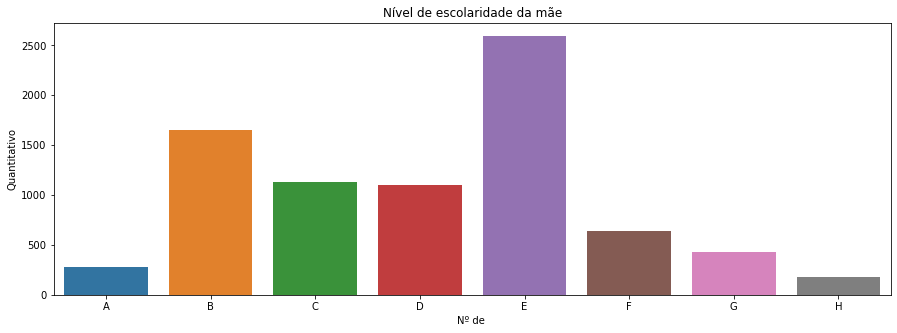

In [121]:
plt.figure(figsize=(15,5))
plt.title("Nível de escolaridade da mãe")
ax = sns.countplot(x=data['Q002'].astype(mother_education_dtype).sort_values(ascending=True))
# ax.yaxis.set_major_formatter(tkr.FuncFormatter(formatador_de_milhares))
plt.xlabel('Nº de ')
plt.ylabel('Quantitativo')
plt.show()

## 6 - Factor Parental profession

### 6.1 Profissão do pai (Q003)

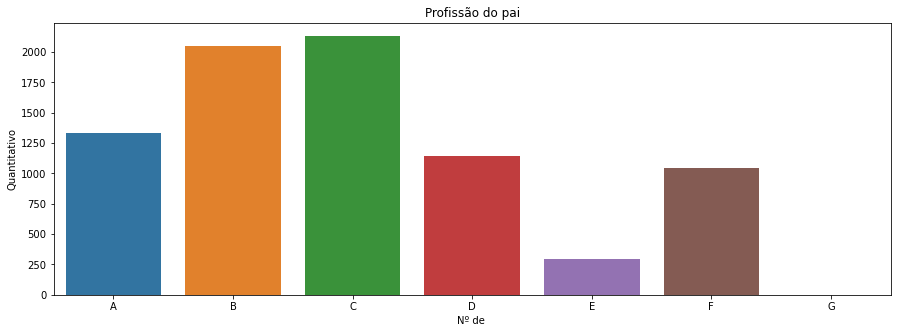

In [122]:
plt.figure(figsize=(15,5))
plt.title("Profissão do pai")
ax = sns.countplot(x=data['Q003'].astype(father_profession_dtype).sort_values(ascending=True))
# ax.yaxis.set_major_formatter(tkr.FuncFormatter(formatador_de_milhares))
plt.xlabel('Nº de ')
plt.ylabel('Quantitativo')
plt.show()

### 6.2 Profissão da mãe (Q004)

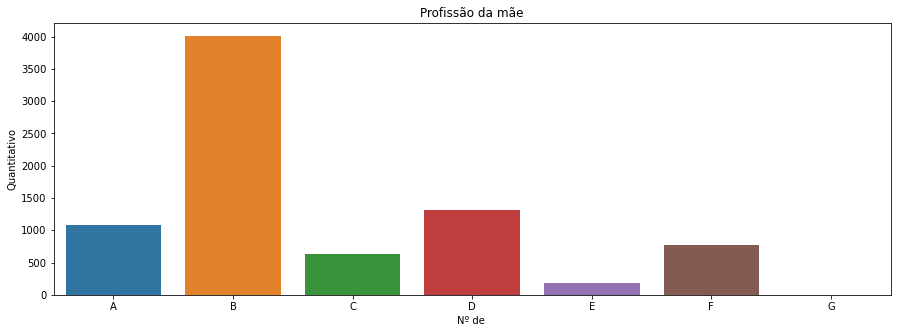

In [123]:
plt.figure(figsize=(15,5))
plt.title("Profissão da mãe")
ax = sns.countplot(x=data['Q004'].astype(mother_profession_dtype).sort_values(ascending=True))
# ax.yaxis.set_major_formatter(tkr.FuncFormatter(formatador_de_milhares))
plt.xlabel('Nº de ')
plt.ylabel('Quantitativo')
plt.show()

## Factor 7: Income

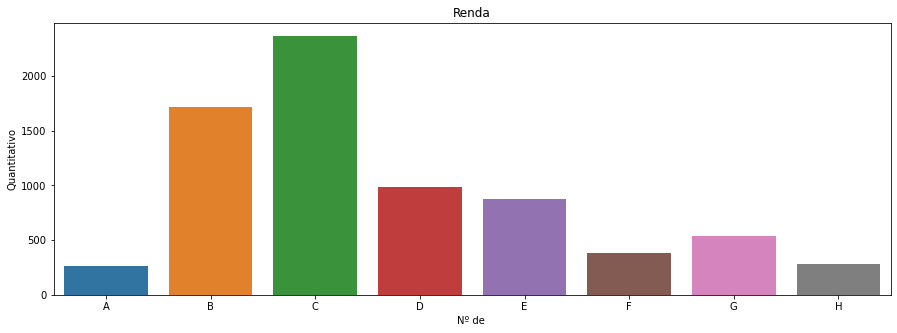

In [124]:
plt.figure(figsize=(15,5))
plt.title("Renda")
ax = sns.countplot(x=data['Q006'].astype(mother_education_dtype).sort_values(ascending=True))
plt.xlabel('Nº de ')
plt.ylabel('Quantitativo')
plt.show()

## Factor 8: socioeconomic status (SES)

It measures the amount of itens selected

### Vamos avaliar a distribuição de notas por cada prova.

Alguns exemplos são a distribuição das notas na prova de redação e linguagem e comunicação:

Text(0.5, 1.0, 'Distribuição de notas de MT')

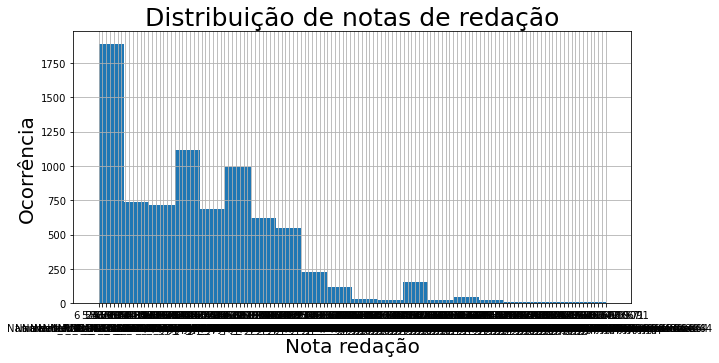

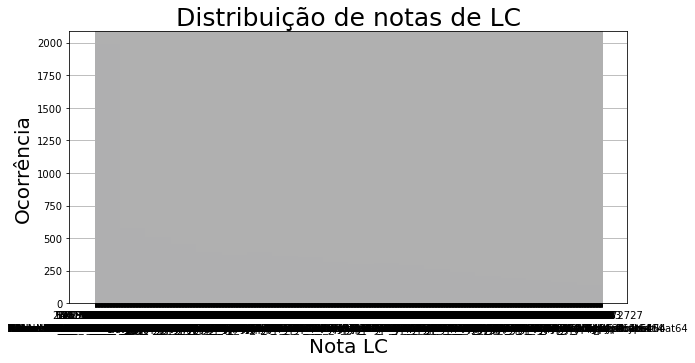

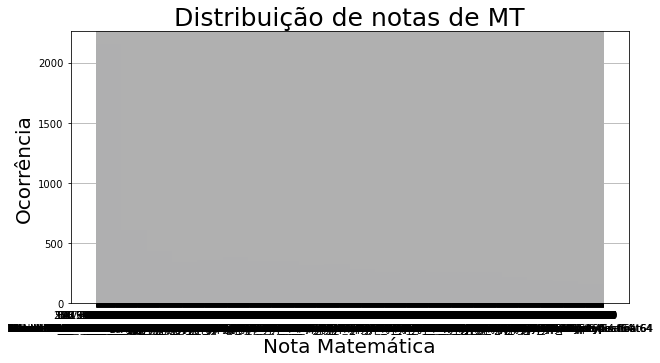

In [125]:
# Histograma notas redação)
plt.figure()
data['NU_NOTA_REDACAO'].hist(bins=20, figsize=(10,5))
plt.xlabel('Nota redação', fontsize=20)
plt.ylabel('Ocorrência',fontsize=20)
plt.title('Distribuição de notas de redação',fontsize=25)

plt.figure()
data['NU_NOTA_LC'].hist(bins=20, figsize=(10,5))
plt.xlabel('Nota LC',fontsize=20)
plt.ylabel('Ocorrência',fontsize=20)
plt.title('Distribuição de notas de LC',fontsize=25)

plt.figure()
data['NU_NOTA_MT'].hist(bins=20, figsize=(10,5))
plt.xlabel('Nota Matemática',fontsize=20)
plt.ylabel('Ocorrência',fontsize=20)
plt.title('Distribuição de notas de MT',fontsize=25)

In [126]:
provas = ['NU_NOTA_LC', 'NU_NOTA_REDACAO']
data[provas].describe()

,NU_NOTA_LC,NU_NOTA_REDACAO
count,8000,8000
unique,2361,134
top,"25 550.166152\nName: NU_NOTA_LC, dtype: flo...","25 564.859551\nName: NU_NOTA_REDACAO, dtype..."
freq,429,429


In [127]:
data[provas].plot.box(figsize=(10,10), grid=True)

TypeError: no numeric data to plot

In [ ]:
provas_mt = ['NU_NOTA_MT']
data[provas_mt].describe()

,NU_NOTA_MT
count,3.905099e+06
mean,5.354056e+02
std,1.031512e+02
min,0.000000e+00
25%,4.553000e+02
50%,5.166000e+02
75%,6.007000e+02
max,9.961000e+02


<AxesSubplot:>

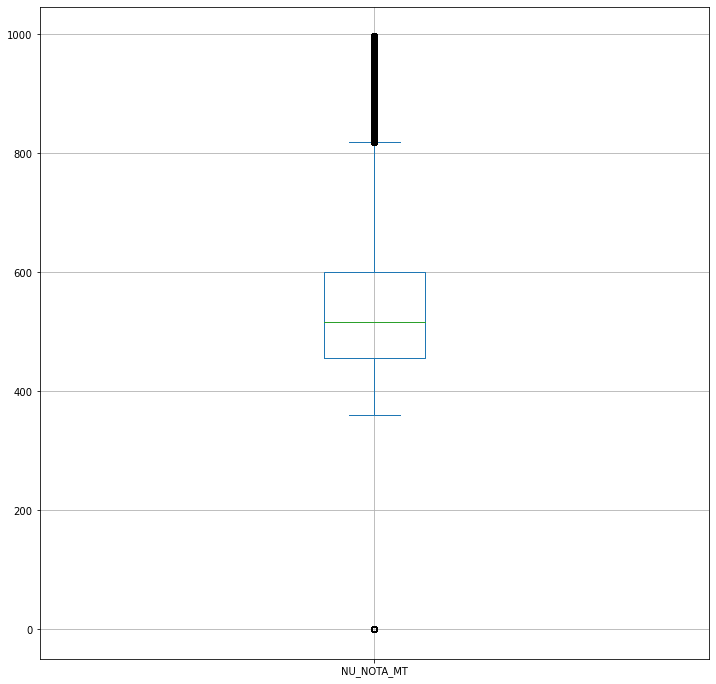

In [ ]:
data[provas_mt].plot.box(figsize=(12,12), grid=True)

In [ ]:
# Histograma notas redação)
plt.figure()
data['NU_NOTA_REDACAO'].hist(bins=20, figsize=(10,5))
plt.xlabel('Nota redação', fontsize=20)
plt.ylabel('Ocorrência',fontsize=20)
plt.title('Distribuição de notas de redação',fontsize=25)